#Exercise
This is a dataset related to how much money a person can get from a mortgage on his or her home. This dataset includes the following features:
* Gender: Gender of the borrower (including two values 'F' and 'M')
* Age: Age of the customer applying for a loan (including positive integer values)
* Income (USD): Customer's income in USD (value is a positive number)
* Income Stability: The level of customer's income stability (including three values of Low and High)
* Property Age: Life expectancy of the house in days (including positive integer values)
* Property Location: Location of the house (including 'Rural', 'Urban', and 'Semi-Urban')
* Property Price: The value of the house in USD (including positive real values)
* Loan Sanction Amount (USD): Amount that customers can borrow in USD (target value)

Based on practice sample #1, proceed:
1. Read data
2. Visualize some information of data
3. Normalize Data to train linear regression model
4. Train linear regression model and show the model's intercepts, coeficients
5. Learn on sklearn how to use Ridge, Lasso, and ElasticNet compare the error of all 3 algorithms with Linear Regression (https://scikit-learn.org/stable/index.html)
6. Let's try Polynomial of order 2 to compare the previous results. What will the result be if we choose the n order too high?


**Submission Link**: https://forms.gle/WKCJUp7noHAKALNP9 (Submit your .ipynb file)

In [1]:
# mount data from google drive to colab

#import library
import pandas as pd # pandas 
import numpy as np # numpy
import time
import matplotlib.pyplot as plt


# Prepare and Analyze Data

1. Load Dataset
2. Analyze Dataset
3. Preprocess data (type, null, missing, ...)
4. Feature Engineering

## Load Dataset

In [2]:
# read data using Pandas DataFrame
def read_dataset(path):
    # Todo: read_csv from a path and return a DataFrame
    df = pd.read_csv(path)
    display(df.head())
    display(df.describe())
    return df

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.25,Low,1651.25,Rural,59641.82,21026.420753
1,M,29,1989.71,Low,1990.71,Urban,179858.51,60595.183366
2,F,37,1849.91,Low,1856.91,Rural,117297.62,39181.648002
3,M,65,2735.18,High,2747.18,Rural,354417.72,128497.710865
4,F,62,4741.78,High,4740.78,Urban,82049.80,39386.919336


,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
count,47297.000000,47265.000000,47263.000000,4.729700e+04,47297.000000
mean,40.000063,2586.684384,2586.611058,1.350880e+05,46487.229765
std,16.086128,1558.768809,1558.842286,9.457875e+04,32549.905634
min,18.000000,372.700000,370.700000,7.859620e+03,254.586578
25%,24.000000,1653.740000,1652.820000,6.250408e+04,21782.822159
50%,40.000000,2245.480000,2244.810000,1.130936e+05,38822.132402
75%,55.000000,3128.560000,3128.380000,1.819546e+05,62612.236905
max,65.000000,54662.750000,54647.750000,1.077967e+06,366131.165218


<AxesSubplot:xlabel='Loan Sanction Amount (USD)', ylabel='Count'>

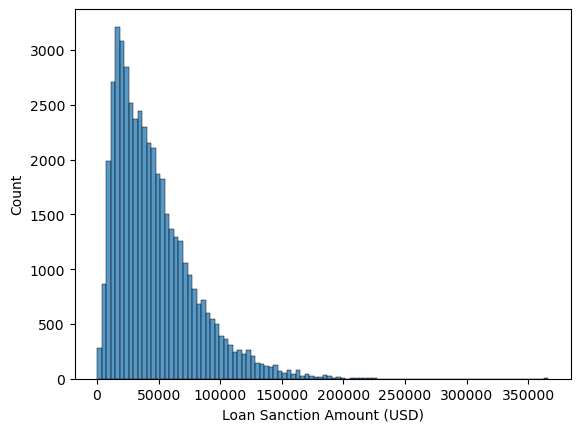

In [3]:
PATH = 'final_house_loan.csv' # Path to your file

df = read_dataset(PATH)
#ToDo: Show histogram of dataframe
import seaborn as sns
sns.histplot(x="Loan Sanction Amount (USD)", data=df, bins=100)

## Data Analysis

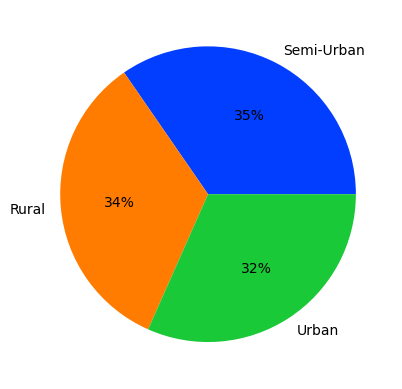

In [4]:
# Data analysis
# Todo: analyze your data here
palette_color = sns.color_palette('bright')
plt.pie(df['Property Location'].value_counts().values, labels=df['Property Location'].value_counts().index,colors=palette_color, autopct='%.0f%%')
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='Count'>

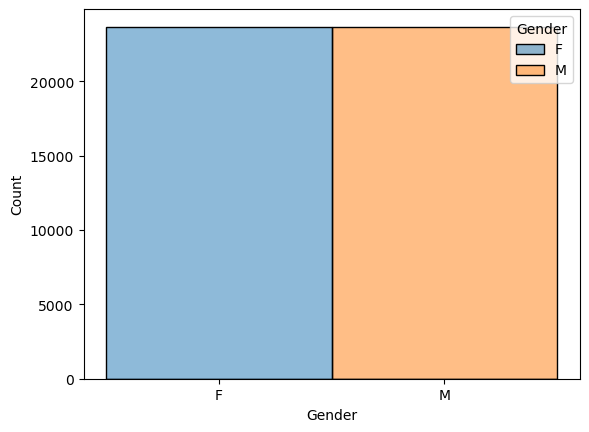

In [5]:
sns.histplot(x='Gender',data=df,hue='Gender')

<AxesSubplot:xlabel='Income Stability', ylabel='Count'>

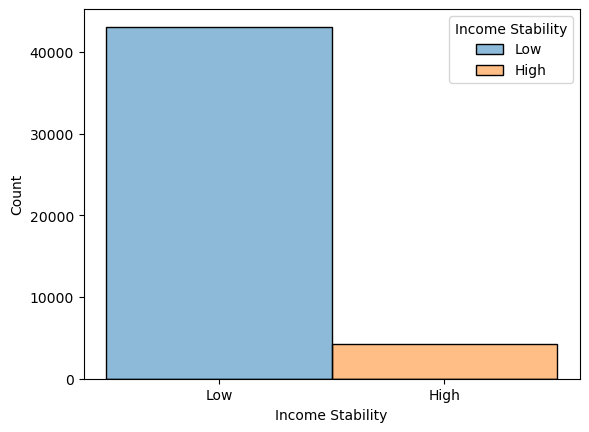

In [6]:
sns.histplot(x='Income Stability',data=df,hue='Income Stability')

## Preprocessing

In [7]:
def preprocessing_data(df):
    # --- (Optional) Drop null datapoints or fill missing data
    # Keep your data the same if you dont want to customize it
    df = df.dropna()
    return df

In [8]:
df = preprocessing_data(df.copy())
df

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.25,Low,1651.25,Rural,59641.82,21026.420753
1,M,29,1989.71,Low,1990.71,Urban,179858.51,60595.183366
2,F,37,1849.91,Low,1856.91,Rural,117297.62,39181.648002
3,M,65,2735.18,High,2747.18,Rural,354417.72,128497.710865
4,F,62,4741.78,High,4740.78,Urban,82049.80,39386.919336
...,...,...,...,...,...,...,...,...
47292,F,62,2121.48,Low,2135.48,Rural,240291.63,78800.491330
47293,M,38,1506.72,Low,1505.72,Rural,218431.37,72483.293359
47294,F,20,1595.10,Low,1582.10,Semi-Urban,154458.88,52462.861498
47295,F,50,2002.27,Low,2007.27,Semi-Urban,72277.78,22909.596763


## Feature Engineering

In [9]:
def normalize_data(df):
    df = df.copy()# Todo: normalize data into numerical data
    for col in df.columns: #tự động hóa cho mỗi cột dữ liệu được chuyển sang category
        if(df.dtypes[col]=='O'):  #lý do sử dụng dòng for là bởi vì khi những dữ liệu thực tế thì sẽ có khá là nhiều những cột cần phải chuyển sang category 
            if len(df[col].unique()) == 2:
                df[col] = df[col].apply(lambda x: 0 if x==df[col][0] else 1)
            elif len(df[col].unique()) > 2:
                df[col] = df[col].apply(lambda x: 0 if x==df[col][0] else 1 if x==df[col][1] else 2)
    return df

In [10]:
normalize_data(df)

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,0,19,1641.25,0,1651.25,0,59641.82,21026.420753
1,1,29,1989.71,0,1990.71,1,179858.51,60595.183366
2,0,37,1849.91,0,1856.91,0,117297.62,39181.648002
3,1,65,2735.18,1,2747.18,0,354417.72,128497.710865
4,0,62,4741.78,1,4740.78,1,82049.80,39386.919336
...,...,...,...,...,...,...,...,...
47292,0,62,2121.48,0,2135.48,0,240291.63,78800.491330
47293,1,38,1506.72,0,1505.72,0,218431.37,72483.293359
47294,0,20,1595.10,0,1582.10,2,154458.88,52462.861498
47295,0,50,2002.27,0,2007.27,2,72277.78,22909.596763


<AxesSubplot:>

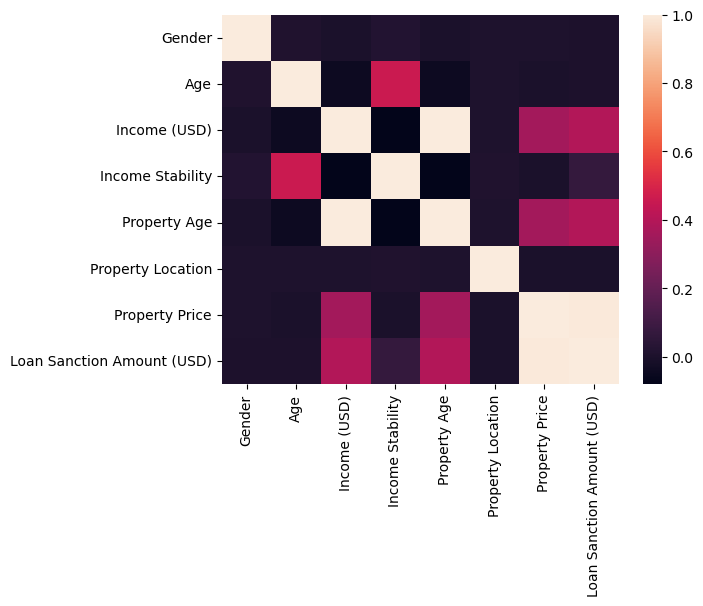

In [11]:
# Heatmap
import seaborn as sns

df = normalize_data(df.copy())
sns.heatmap(df.corr()) # Show heatmap after normalized data

# Apply machine learning model

## Train-test split

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [13]:
def prepare_X_y(df):
    # Split data into X and y. Return two dataframes
    columns = df.columns.tolist()     # Columns name
    columns.remove('Loan Sanction Amount (USD)')   
    X = df[columns] # Todo: Select features
    y = df['Loan Sanction Amount (USD)'] # Todo: Select label
    return X, y

X, y = prepare_X_y(df)

In [14]:
def split_train_test(X, y, train_size=0.7):
    # Use sklearn train_test_split to split X and y into 2 sets: train set and test set. With train_size is the proportion of train_set and fix the random_state with a number
    trainX, testX ,trainY, testY = train_test_split(X, y, train_size = train_size, random_state = 50) 
    print('Training:' + str(trainX.shape))
    print('Test:' + str(testX.shape))

    return trainX, testX ,trainY, testY

In [15]:
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = split_train_test(X, y, train_size=TRAIN_SIZE)

Training:(33075, 7)
Test:(14176, 7)


## Basic Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression


def build_linear_model(X, y):
    model = LinearRegression(fit_intercept=True)   
    model.fit(trainX, trainY) 

    return model

model = build_linear_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)   
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)   
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_


mean absolute error of linear model on train set  134.79317051486197
mean absolute error of linear model on test set  115.96409349175835
[-2.43535732e+02 -7.91689564e+01  5.00054595e-01  1.11517477e+04
  5.27898381e-01 -1.37834783e+02  3.36260520e-01]

828.4171865842


In [17]:
from sklearn.linear_model import Lasso


def build_lasso_model(X, y):
    model = Lasso(fit_intercept=True)# Todo: use sklearn model and config your parameters
    model.fit(trainX, trainY) # Todo: fit your model with X, y

    return model

model = build_lasso_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)   
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)   
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_


mean absolute error of linear model on train set  135.86182375880375
mean absolute error of linear model on test set  116.94608054276411
[-2.39514137e+02 -7.90365939e+01  8.44615805e-01  1.11356985e+04
  1.83148163e-01 -1.36350419e+02  3.36261210e-01]

821.4275299408764


C:\Users\xuong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.812e+10, tolerance: 3.485e+09
  model = cd_fast.enet_coordinate_descent(


In [18]:
from sklearn.linear_model import Ridge


def build_ridge_model(X, y):
    model = Ridge(fit_intercept=True)# Todo: use sklearn model and config your parameters
    model.fit(trainX, trainY) # Todo: fit your model with X, y

    return model

model = build_ridge_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)   
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)   
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_


mean absolute error of linear model on train set  135.12063191989796
mean absolute error of linear model on test set  116.27403556108263
[-2.43470632e+02 -7.91265051e+01  5.01746365e-01  1.11464709e+04
  5.26137855e-01 -1.37814734e+02  3.36260783e-01]

827.2798741739462


In [19]:
from sklearn.linear_model import ElasticNet


def build_elastic_model(X, y):
    model = ElasticNet(fit_intercept=True)# Todo: use sklearn model and config your parameters
    model.fit(trainX, trainY) # Todo: fit your model with X, y

    return model

model = build_elastic_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)   
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)   
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_


mean absolute error of linear model on train set  1758.5953341070247
mean absolute error of linear model on test set  1740.8507733500455
[-5.82778262e+01  3.65626903e-01  9.54006199e-01  1.26209136e+03
 -5.51152585e-02 -6.42583375e+01  3.36753134e-01]

-1369.27190945662


C:\Users\xuong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.573e+11, tolerance: 3.485e+09
  model = cd_fast.enet_coordinate_descent(


#### Kết luận: nhìn tổng quan mà nói thì 3 model linear regression, lasso, Ridge có MAE khá là tương đồng với nhau
#### Có thể nói rằng 3 mô hình này đưa ra kết quả khá tốt 
#### nhưng nhìn chi tiết mà đánh giá thì linear regression có MAE nhỏ nhất so với 2 thuật toán kia.
#### còn đôi với model ElasticNet thì lại cho ra MAE khá lớn có thể nói rằng mô hình này khá tệ đôi với bộ dataset này


## Polynomial Transform 

When the data feature does not conform to a linear function, a linear regression cannot be applied directly to the original data. Then, there are many possibilities that the data feature conforms to the polynomial function. Scikit-Learn supports converting data features to polynomials through ``PolynomialFeatures``.

$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$

The formula above uses the transformation of the value $x$ from one dimension to the other, with the aim of being able to use linear regression to find complex relationships between $x$ and $y$.

In [20]:
#Linear Regression with Polynomial Transform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def build_pipeline(X, y):
    poly_model = make_pipeline(PolynomialFeatures(2, include_bias=False), LinearRegression())
    poly_model.fit(X, y)  

    return poly_model

poly_model = build_pipeline(trainX, trainY)
# Compare on training dataset
poly_pred = poly_model.predict(trainX)   
print("mean absolute error of linear model (with poly transform) on train set ", mean_absolute_error(y_pred=poly_pred, y_true=trainY) )

poly_pred = poly_model.predict(testX)
print("mean absolute error of linear model (with poly transform) on test set ", mean_absolute_error(y_pred=poly_pred, y_true=testY))

mean absolute error of linear model (with poly transform) on train set  153.79184223309656
mean absolute error of linear model (with poly transform) on test set  135.27518866360919


#### Dựa trên kết quả của cả 2 khi có và không sử dụng PolynomialFeatures thì kết quả 
#### của việc không sử dụng PolynomialFeatures cho ra số mean ở 2 data train và test nhỏ hơn nhiều so với việc sử dụng
#### có thể nói việc không sử dụng PolynomialFeatures sẽ làm cho mô hình hoạt động tốt hơn ở dataset này